In [39]:
#Import the necessary libraries

import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
#Load the data and visualize the data

flower_df = pd.read_csv("IRIS_ Flower_Dataset.csv")
flower_df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [41]:
#Clean and split the data

X = flower_df.drop('species', axis=1)
y = flower_df['species']

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [42]:
#Build and train the Random Forest classifier model

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
#Predict on test data and show the accuracy

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9833333333333333


In [44]:
#Show the classification report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



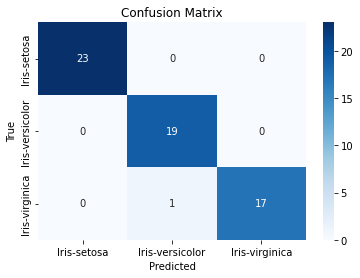

In [45]:
#Show the confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

cm = confusion_matrix(y_test,y_pred, labels=labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()


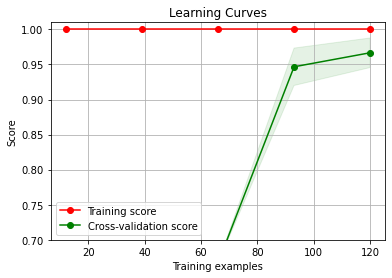

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves"
plot_learning_curve(rf_classifier, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

In [46]:
#Save the model

import joblib

model_filename = 'trained_model_flower.joblib'
joblib.dump(rf_classifier, model_filename)
print(f'Model saved as {model_filename}')

Model saved as trained_model_flower.joblib
